In [3]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
from termcolor import colored

In [ ]:
# TensorFlow로 Model을 만드는 방법으로는 
# - Sequential: Keras 의 특징, 하지만 자율성이 없다
# - Functional: 
# - Model Sub-Classing: Advance된 technique 사용 가능

# Sequential Model Using Keras

<dtype: 'float32'> <dtype: 'float32'>
<dtype: 'float32'> <dtype: 'float32'>


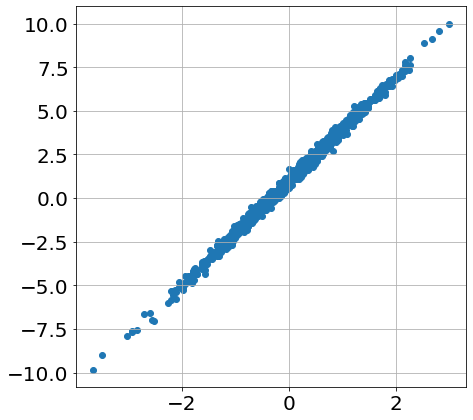

In [51]:
x_train = tf.random.normal(shape = (1000,), dtype = tf.float32)
y_train = 3* x_train + 1 + (0.2*tf.random.normal(shape = (1000,),
                                                 dtype=tf.float32))

x_test = tf.random.normal(shape = (300,), dtype = tf.float32)
y_test = 3* x_test + 1 + (0.2*tf.random.normal(shape = (300,),
                                               dtype=tf.float32))

print(x_train.dtype, y_train.dtype)
print(x_test.dtype, y_test.dtype)


fig,ax = plt.subplots(figsize = (7,7))
ax.scatter(x_train.numpy(), y_train.numpy())
ax.tick_params(labelsize = 20)
ax.grid()

In [31]:
# activation 이 없는게 linear activation
# need single neuron

#Keras를 이용하기
#Sequential 안에 list가 들어간다 
model = tf.keras.Sequential([tf.keras.layers.Dense(units = 1,
                                                   activation = "linear"),
                            ])
#compliation
model.compile(loss = "mean_squared_error", 
              optimizer = "SGD")

#training
model.fit(x_train, 
          y_train, 
          epochs = 10, 
          batch_size = 32, 
          verbose = 1)

#evaluate
model.evaluate(x_test,y_test,verbose = 2)

Epoch 1/10
32/32 [==============================] - 0s 749us/step - loss: 9.8528
Epoch 2/10
32/32 [==============================] - 0s 906us/step - loss: 2.4851
Epoch 3/10
32/32 [==============================] - 0s 956us/step - loss: 0.6266
Epoch 4/10
32/32 [==============================] - 0s 885us/step - loss: 0.1899
Epoch 5/10
32/32 [==============================] - 0s 813us/step - loss: 0.0788
Epoch 6/10
32/32 [==============================] - 0s 957us/step - loss: 0.0507
Epoch 7/10
32/32 [==============================] - 0s 886us/step - loss: 0.0438
Epoch 8/10
32/32 [==============================] - 0s 882us/step - loss: 0.0420
Epoch 9/10
32/32 [==============================] - 0s 893us/step - loss: 0.0415
Epoch 10/10
32/32 [==============================] - 0s 787us/step - loss: 0.0414
10/10 - 0s - loss: 0.0415


0.04145864024758339

In [36]:
w,b = model.get_weights()
print("w:",w)
print("b:",b)

w: [[3.0000708]]
b: [0.996206]


# Model Sub-Classing 

<dtype: 'float32'> <dtype: 'float32'>
<dtype: 'float32'> <dtype: 'float32'>


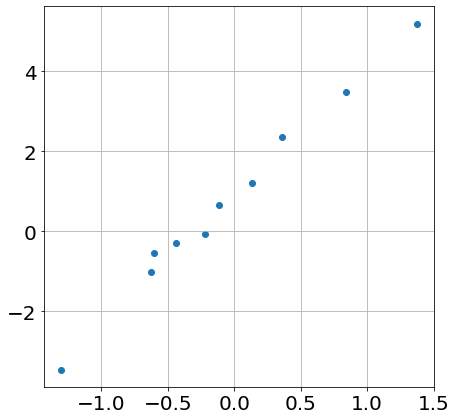

In [76]:
x_train = tf.random.normal(shape = (10,), dtype = tf.float32)
y_train = 3* x_train + 1 + (0.2*tf.random.normal(shape = (10,),
                                                 dtype=tf.float32))

x_test = tf.random.normal(shape = (3,), dtype = tf.float32)
y_test = 3* x_test + 1 + (0.2*tf.random.normal(shape = (3,),
                                               dtype=tf.float32))

print(x_train.dtype, y_train.dtype)
print(x_test.dtype, y_test.dtype)


fig,ax = plt.subplots(figsize = (7,7))
ax.scatter(x_train.numpy(), y_train.numpy())
ax.tick_params(labelsize = 20)
ax.grid()

In [81]:
# Using Model Sub-Classing

# TensorFlow 의 Keras Model를 상속 받는다 
class LinearPredictor(tf.keras.Model):
    def __init__(self):
        # 상속한 super class의 constructor 사용
        super(LinearPredictor, self).__init__()
        
        #model에 들어갈 재료들을 선언 (layer의 이름도 지정해줌)
        self.layer_1 = tf.keras.layers.Dense(units = 1, 
                                        activation = "linear")
        
    #forward prop 시킬때 어떻게 실행할지
    def call(self, x):
        x = self.layer_1(x)
        return x

LR = 0.1 #learning_rate
EPOCHS = 5 #epochs
    
model = LinearPredictor() #instantiate learning object
loss_object = tf.keras.losses.MeanSquaredError() # define loss
optimizer = tf.keras.optimizers.SGD(learning_rate = LR) # define optimizer        

In [82]:
#GradientTape을 이용해서 training/learning

for epoch in range(EPOCHS):
    # SGD로 example을 하나씩 받아옴
    
    for x,y in zip(x_train,y_train):
        x = tf.reshape(x, shape = (1,1))
        
        #Gradient Tape을 이용해서 gradient저장 
        with tf.GradientTape() as tape:
            #forward prop
            prediction = model(x)
            loss = loss_object(y,prediction)
        
        #tape안에 저장된 forward prop으로 gradients를 계산한다
        #loss에 대해서 model안의 trainable_variables의 gradient를 구한다
        gradients = tape.gradient(loss, model.trainable_variables) 
        
        #위 gradients 에는 여러 variable의 상응하는 gradients가 들어있기때문에 zip으로 pair를 맞춰준다
        #model 의 trainable_variables를 update를 시켜준다
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    print(colored("EPOCH:{}".format(epoch+1), "grey", "on_cyan"))
    template = "Train loss: {:.4f}\n"
    print(template.format(loss))


EPOCH:1
Train loss: 0.0721

EPOCH:2
Train loss: 0.0120

EPOCH:3
Train loss: 0.0051

EPOCH:4
Train loss: 0.0039

EPOCH:5
Train loss: 0.0037



In [83]:
model.get_weights()

[array([[3.127683]], dtype=float32), array([0.98025036], dtype=float32)]